In [2]:
#Q1 part a)
from SolveLinear import GaussElim, PartialPivot
import numpy as np
A = np.array([2.,1.,4.,1.,3.,4.,-1.,-1.,1.,-4.,1.,5.,2.,-2.,1.,3.]).reshape(4,4)
v = np.array([-4.,3.,9.,7.])

x1 = GaussElim(A,v)
x2 = PartialPivot(A,v)
print('It is '+str(np.allclose(np.dot(A, x2), v))+' that PartialPivot yields the correct solution')

It is True that PartialPivot yields the correct solution


In [3]:
#Q1 part b)
from random import randint
#solve uses LU decomposition with backsubstitution
from numpy.linalg import solve 
from time import time
#an array of values N which define matrix size
Ns = np.arange(5,300,2)
time_LU = np.empty(len(Ns))
time_Gauss = np.empty(len(Ns))
time_Pivot = np.empty(len(Ns))
err_LU = np.empty(len(Ns))
err_Gauss = np.empty(len(Ns))
err_Pivot = np.empty(len(Ns))
x_LU = 0.0
x_Gauss = 0.0
x_Pivot = 0.0
for k in range(len(Ns)): # for each of these values
    N = Ns[k]
    #lets generate random square matrices and N-length vectors
    v = np.empty(N) #vector preallocation
    A = np.empty(N**2) #matrix preallocation
    for i in range(N**2):
        if i<N: #only need N values to fill vector
            #chose range to not include 0 so Gauss elim wouldnt potentially fail
            r1 = randint(1,100) #generate pseudo-random int
            v[i] = r1 #fill enty of v
        r2 = randint(1,100) #generate pseudo-random int
        A[i] = r2 #fill entry of A
    A = A.reshape(N,N) #reshape N^2-length vector into NxN matrix
    #Now, lets solve using LU, GaussElim, PartialPivot
    #LU
    t1 = time()
    x_LU = solve(A,v)
    t2 = time()
    time_LU[k] = t2-t1
    v_LU = np.dot(A,x_LU)
    err_LU[k] = np.mean(abs(v-v_LU))
    #Gaussian elimination
    t1 = time()
    x_Gauss = GaussElim(A,v)
    t2 = time()
    time_Gauss[k] = t2-t1
    v_Gauss = np.dot(A,x_Gauss)
    err_Gauss[k] = np.mean(abs(v-v_Gauss))
    #Partial Pivot
    t1 = time()
    x_Pivot = PartialPivot(A,v)
    t2 = time()
    time_Pivot[k] = t2-t1
    v_Pivot = np.dot(A,x_Pivot)
    err_Pivot[k] = np.mean(abs(v-v_Pivot))
    
    
#TO DO Exclude zeros in time arrays and plot in log


In [4]:
import matplotlib.pyplot as plt

plt.figure()
plt.title('Time vs. Matrix Size N for 3 Different Linear System Solving Methods')
plt.ylabel('Computation Time (s)')
plt.xlabel('Matrix Size (square) N')
plt.scatter(Ns, time_LU, label = 'LU')
plt.scatter(Ns, time_Gauss, label = 'Gauss. Elim.')
plt.scatter(Ns, time_Pivot, label = 'Partial Pivot')
plt.legend()

plt.figure()
plt.title('Error vs. Matrix Size N for 3 Different Linear System Solving Methods')
plt.xlabel('Matrix Size (square) N')
plt.ylabel('Log of Error')
plt.yscale('log')
plt.scatter(Ns, err_LU, label = 'LU')
plt.scatter(Ns, err_Gauss, label = 'Gauss. Elim.')
plt.scatter(Ns, err_Pivot, label = 'Partial Pivot')
plt.legend()

In [5]:
#Q1 part c)
#define constants
R1 = 1 #kOhm
R3 = 1 #kOhm
R5 = 1 #kOhm
R2 = 2 #kOhm
R4 = 2 #kOhm
R6 = 2 #kOhm
C1 = 1 #micro F
C2 = 0.5 #micro F
xplus = 3 #V
w = 1000 #rad s^-1
#define system Mx = y
M = np.array([[((1/R1) + (1/R4)+1j*w*C1),1j*w*C1,0],[-1j*w*C1,((1/R2) + (1/R5) + 1j*w*C1 + 1j*w*C2),-1j*w*C2],[0, -1j*w*C2, ((1/R3) + (1/R6) + 1j*w*C2)]],dtype=np.complex_)
y = np.array([(xplus/R1), (xplus/R2), (xplus/R3)],dtype=np.complex_)
#TO DO covert units?

In [6]:
#solve for x
x = PartialPivot(M,y) 

In [7]:
# at t=0 V1, V2, V3 are...
V1 = x[0]
V2 = x[1]
V3 = x[2]
#magnitudes
modulo_V1 = abs(V1)
modulo_V2 = abs(V2)
modulo_V3 = abs(V3)
#phases
phase_V1 = np.angle(V1)
phase_V2 = np.angle(V2)
phase_V3 = np.angle(V3)

print('For RC circuit...')

print('modulo(V1) = {0}'.format(modulo_V1))
print('modulo(V2) = {0}'.format(modulo_V2))
print('modulo(V3) = {0}'.format(modulo_V3))

print('phase of V1 = {0}'.format(phase_V1))
print('phase of V2 = {0}'.format(phase_V2))
print('phase of V3 = {0}'.format(phase_V3))


For RC circuit...
modulo(V1) = 0.0007500318504648686
modulo(V2) = 0.003749983926736617
modulo(V3) = 0.00974993254934607
phase of V1 = 1.5850459866422504
phase of V2 = -1.5682463388356545
phase of V3 = -1.5668155739330156


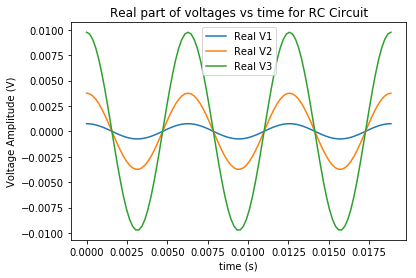

In [8]:
#plot voltages with their time-evolving phases for several periods
#for RC circuit
T = 2*np.pi/w #1 period in s
t = np.linspace(0,3*T,100)

V1_real = V1.real*np.cos(w*t) - V1.imag*np.sin(w*t)
V2_real = V2.real*np.cos(w*t) - V2.imag*np.sin(w*t)
V3_real = V3.real*np.cos(w*t) - V3.imag*np.sin(w*t) 

plt.figure()
plt.plot(t,modulo_V1*np.cos(w*t),label = 'Real V1')
plt.plot(t,modulo_V2*np.cos(w*t),label = 'Real V2')
plt.plot(t,modulo_V3*np.cos(w*t),label = 'Real V3')
plt.title('Real part of voltages vs time for RC Circuit')
plt.ylabel('Voltage Amplitude (V)')
plt.xlabel('time (s)')
plt.legend()


In [9]:
Mp = np.array([[((1/R1) + (1/R4)+1j*w*C1),1j*w*C1,0],[-1j*w*C1,((1/R2) + (1/R5) + 1j*w*C1 + 1j*w*C2),-1j*w*C2],[0, -1j*w*C2, ((1/R3) + (1/(1j*R6)) + 1j*w*C2)]],dtype=np.complex_)
#solve (Mp)(xp) = y
xp = PartialPivot(Mp,y) 


In [10]:
# at t=0 V1, V2, V3 are...
V1p = xp[0]
V2p = xp[1]
V3p = xp[2]
#magnitudes
modulo_V1p = abs(V1p)
modulo_V2p = abs(V2p)
modulo_V3p = abs(V3p)
#phases
phase_V1p = np.angle(V1p)
phase_V2p = np.angle(V2p)
phase_V3p = np.angle(V3p)

print('For RLC circuit...')

print('modulo(V1) = {0}'.format(modulo_V1p))
print('modulo(V2) = {0}'.format(modulo_V2p))
print('modulo(V3) = {0}'.format(modulo_V3p))

print('phase of V1 = {0}'.format(phase_V1p))
print('phase of V2 = {0}'.format(phase_V2p))
print('phase of V3 = {0}'.format(phase_V3p))

For RLC circuit...
modulo(V1) = 0.0007524610444100013
modulo(V2) = 0.0037524348249052602
modulo(V3) = 0.009762173277757427
phase of V1 = 1.5817823302241283
phase of V2 = -1.5688941607312712
phase of V3 = -1.5680624329512014


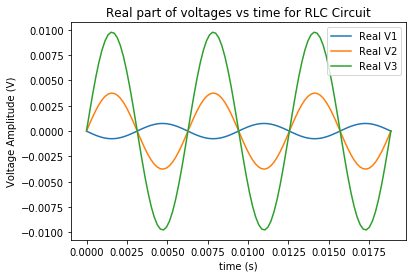

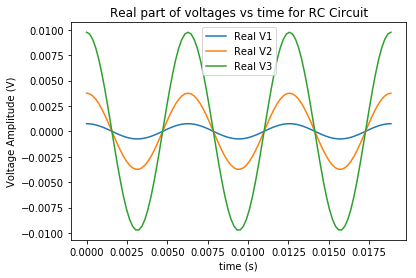

In [11]:
#plot voltages with their time-evolving phases for several periods
#for RLC circuit
V1p_real = V1p.real*np.cos(w*t) - V1p.imag*np.sin(w*t)
V2p_real = V2p.real*np.cos(w*t) - V2p.imag*np.sin(w*t)
V3p_real = V3p.real*np.cos(w*t) - V3p.imag*np.sin(w*t) 

plt.figure()
plt.plot(t,V1p_real,label = 'Real V1')
plt.plot(t,V2p_real,label = 'Real V2')
plt.plot(t,V3p_real,label = 'Real V3')
plt.title('Real part of voltages vs time for RLC Circuit')
plt.ylabel('Voltage Amplitude (V)')
plt.xlabel('time (s)')
plt.legend()

plt.figure()
plt.plot(t,modulo_V1*np.cos(w*t),label = 'Real V1')
plt.plot(t,modulo_V2*np.cos(w*t),label = 'Real V2')
plt.plot(t,modulo_V3*np.cos(w*t),label = 'Real V3')
plt.title('Real part of voltages vs time for RC Circuit')
plt.ylabel('Voltage Amplitude (V)')
plt.xlabel('time (s)')
plt.legend()


Appears only a change in phase of real component occurs. 

In [12]:
print(err_Gauss[:10])

[6.59383659e-13 8.62801893e-14 7.62649203e-13 4.08239099e-13
 5.94396327e-14 5.16327721e-14 4.95499067e-13 7.46443842e-13
 8.95960554e-13 2.57648975e-13]
